# Quantum Error Correction

## Classical repetition code

calculate the probability of error for a repetition code of size 3 and plot the values versus the probability of single bit flip `p`. 

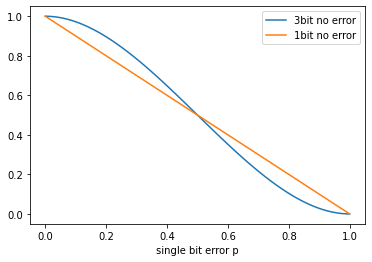

In [67]:
import numpy as np 
import matplotlib.pyplot as plt 

def error_rate_3bit(p):
    
    return p**3 + 3*p**2*(1-p)

p_vals = np.linspace(0, 1, num=100)

plt.plot(p_vals, 1 - error_rate_3bit(p_vals), label='3bit no error')
# plt.plot(p_vals, error_rate_3bit(p_vals), label='3bit error')
plt.plot(p_vals, 1 - p_vals, label='1bit no error')
# plt.plot(p_vals, p_vals, label='1bit error')
plt.xlabel("single bit error p")
plt.legend()

## Quantum bit flip correction

write a function that takes the number of total qubits and returns the circuit that entangles the first qubit with the other qubits. 

In [68]:
from qiskit import * 

def bit_flip_correction(num_qubits):
    
    circ = QuantumCircuit(num_qubits, num_qubits)
    circ.h(0)
    for i in range(num_qubits - 1):
        circ.cx(i, i+1)
    return circ

circuit = bit_flip_correction(3)
circuit.draw()



┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c: 3/═══════════════

In [19]:
backend = Aer.get_backend('statevector_simulator')
job = execute(circuit, backend)
results = job.result()
psi = results.get_statevector(circuit)
print(psi)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


## modeling bit flip error 

Modify your function to include an X gate with probability p.

In [66]:
def bit_flip_correction_noisy(num_qubits, p):
        
    apply_error = np.random.binomial(1, p)
    circ = QuantumCircuit(num_qubits, num_qubits)
    circ.h(0)
    for i in range(num_qubits - 1):
        circ.cx(i, i+1) 
    if apply_error == 1:
        circ.x(0)
    return circ

circuit = bit_flip_correction_noisy(3, 0.25)
circuit.draw()

┌───┐          
q_0: ┤ H ├──■───────
     └───┘┌─┴─┐     
q_1: ─────┤ X ├──■──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘
c: 3/═══════════════

## Phase flip correction

Write a function that implements the 3-bit phase flip code which entangles the first qubit with the other two in the eigenstates of X meaning $|+\rangle$ and $|-\rangle$. The function should return the circuit. 

In [73]:
def phase_flip_circuit(num_qubits):
    
    circ = QuantumCircuit(num_qubits, num_qubits)
    for i in range(num_qubits - 1):
        circ.cx(i, i+1)
    circ.barrier()
    for i in range(num_qubits):
        circ.h(i)
    return circ

circ = phase_flip_circuit(3)
circ.draw()
    

░ ┌───┐
q_0: ──■────────░─┤ H ├
     ┌─┴─┐      ░ ├───┤
q_1: ┤ X ├──■───░─┤ H ├
     └───┘┌─┴─┐ ░ ├───┤
q_2: ─────┤ X ├─░─┤ H ├
          └───┘ ░ └───┘
c: 3/══════════════════

## Quantum Circuit Equivalent Matrix

Calculate the total matrix that is equivalent to the application of two Cx gates betweem the first and second qubits and between the first and third qubits respectively. 

In [3]:
import numpy as np 

Cx = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
I = np.array([[1, 0], [0, 1]])
M = np.kron(Cx, I)

print(M)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]]


In [4]:
W = np.array([[1, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0], 
              [0, 0, 1, 0, 0, 0, 0, 0], 
              [0, 0, 0, 1, 0, 0, 0, 0], 
              [0, 0, 0, 0, 0, 1, 0, 0], 
              [0, 0, 0, 0, 1, 0, 0, 0], 
              [0, 0, 0, 0, 0, 0, 0, 1], 
              [0, 0, 0, 0, 0, 0, 1, 0]])

print(W)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]]


In [6]:
U = np.matmul(W, M)
print(U)

[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]]


## Define the initial state vector for 3 qubits

The first qubit is $|\psi\rangle = 0.3|0\rangle + 0.9|1\rangle$. The other two qubits are at $|0\rangle$ state.

In [13]:
psi = np.array([0.3, 0.9])
zero = np.array([1.0, 0.0])
v = np.kron(psi, zero)
v = np.kron(v, zero)

def print_state(v):
    for i in range(len(v)):
        print(f"{bin(i)}: " + str(v[i]))
        
print_state(v)

0b0: 0.3
0b1: 0.0
0b10: 0.0
0b11: 0.0
0b100: 0.9
0b101: 0.0
0b110: 0.0
0b111: 0.0


In [14]:
v_final = np.matmul(U, v)
print_state(v_final)

0b0: 0.3
0b1: 0.0
0b10: 0.0
0b11: 0.0
0b100: 0.0
0b101: 0.0
0b110: 0.0
0b111: 0.9


## Exercise 

Implement the bit flip error correction circuit using the syndrome measurement technique. Use three qubits for encoding the entangled state and two qubits as syndrome qubits. Draw and simulate the final circuit. 

In [26]:
from qiskit import * 

n = 5

qc = QuantumCircuit(n, n)

# initialize an equal superposition on the first qubit 
qc.h(0)

# entangle the first three qubits
qc.cx(0, 1)
qc.cx(0, 2)

# apply noise/error 
qc.barrier()
idx = np.random.randint(0, 3)
qc.x(idx)
qc.barrier()

# prepare syndrome qubits 
qc.cx(0, 3)
qc.cx(1, 3)
qc.cx(0, 4)
qc.cx(2, 4)

# add measurement to the syndrome qubits 
qc.measure(3, 3)
qc.measure(4, 4)

qc.draw()


┌───┐           ░       ░                           
q_0: ┤ H ├──■────■───░───────░───■─────────■─────────────
     └───┘┌─┴─┐  │   ░ ┌───┐ ░   │         │             
q_1: ─────┤ X ├──┼───░─┤ X ├─░───┼────■────┼─────────────
          └───┘┌─┴─┐ ░ └───┘ ░   │    │    │             
q_2: ──────────┤ X ├─░───────░───┼────┼────┼────■────────
               └───┘ ░       ░ ┌─┴─┐┌─┴─┐  │    │  ┌─┐   
q_3: ────────────────░───────░─┤ X ├┤ X ├──┼────┼──┤M├───
                     ░       ░ └───┘└───┘┌─┴─┐┌─┴─┐└╥┘┌─┐
q_4: ────────────────░───────░───────────┤ X ├┤ X ├─╫─┤M├
                     ░       ░           └───┘└───┘ ║ └╥┘
c: 5/═══════════════════════════════════════════════╩══╩═
                                                    3  4